In [1]:
# import all of the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objs as go

In [2]:
# Download stock data
ticker = 'BAC'
stock_data = yf.download(ticker, start='2020-01-01', end='2025-03-17')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# Display the first few rows of the data
print(stock_data.head())

Price           Close       High        Low       Open    Volume
Ticker            BAC        BAC        BAC        BAC       BAC
Date                                                            
2020-01-02  31.275545  31.293096  30.968407  31.021058  37614200
2020-01-03  30.626163  30.845549  30.503305  30.696365  50357900
2020-01-06  30.582279  30.626159  30.161060  30.196163  42185000
2020-01-07  30.380445  30.643707  30.301467  30.450650  34149000
2020-01-08  30.687582  30.880639  30.319013  30.336565  45311600


In [4]:
# Calculate moving averages
stock_data['20_MA'] = stock_data['Close'].rolling(window=20).mean()
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()

In [5]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

In [6]:
# Calculate cumulative returns
stock_data['Cumulative_Return'] = (1 + stock_data['Daily_Return']).cumprod()

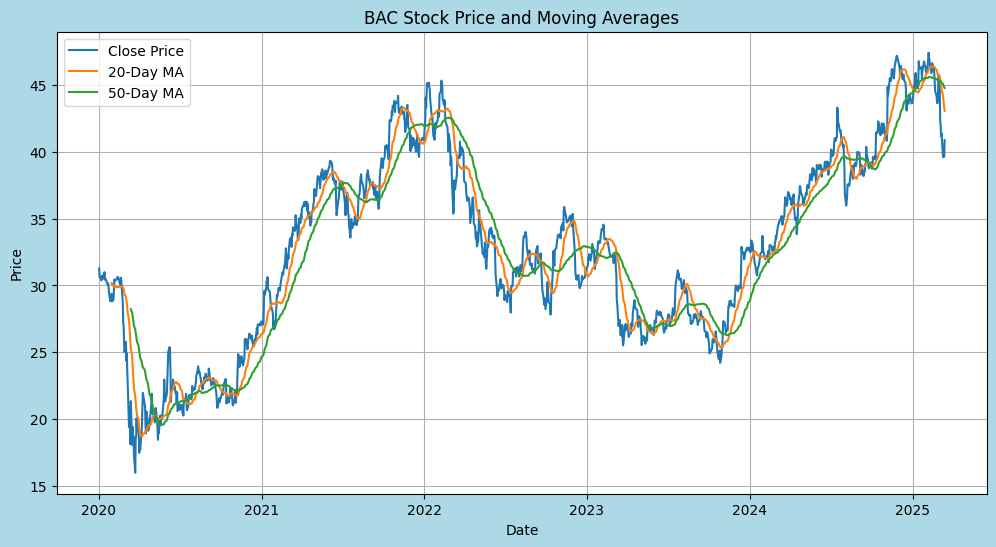

In [7]:
# Plot closing prices and moving averages
plt.figure(figsize=(12, 6), facecolor='lightblue')
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['20_MA'], label='20-Day MA')
plt.plot(stock_data['50_MA'], label='50-Day MA')
plt.title('BAC Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

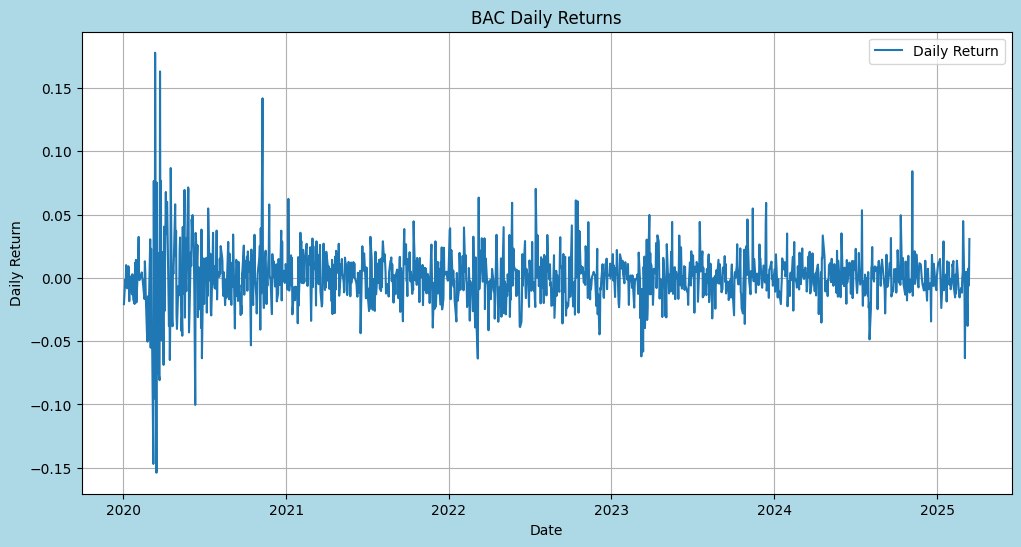

In [8]:
# Plot daily returns
plt.figure(figsize=(12, 6), facecolor='lightblue')
plt.plot(stock_data['Daily_Return'], label='Daily Return')
plt.title('BAC Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

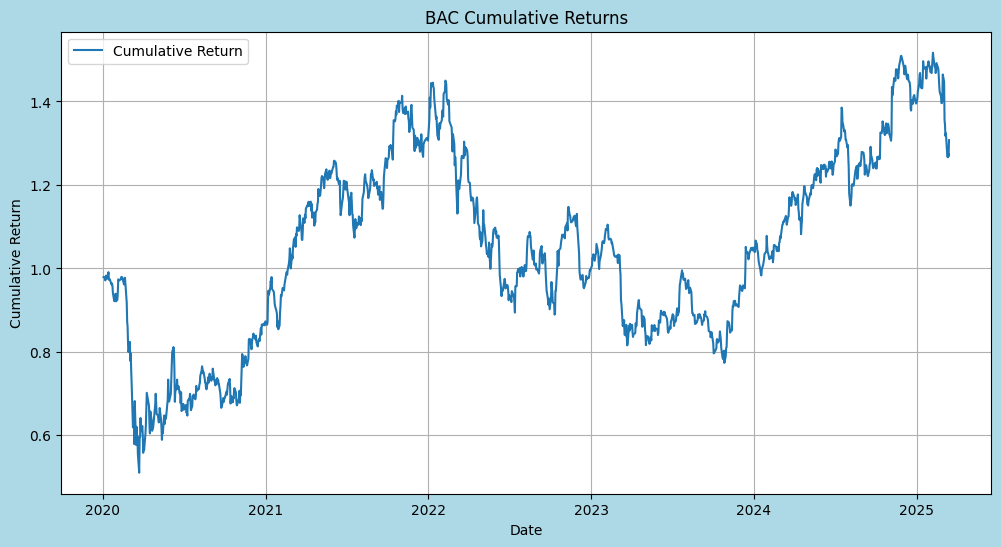

In [9]:
# Plot cumulative returns
plt.figure(figsize=(12, 6), facecolor='lightblue')
plt.plot(stock_data['Cumulative_Return'], label='Cumulative Return')
plt.title('BAC Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI
stock_data['RSI'] = calculate_rsi(stock_data)

In [11]:
# Calculate the 12-period EMA
stock_data['EMA12'] = stock_data['Close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA
stock_data['EMA26'] = stock_data['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
stock_data['MACD'] = stock_data['EMA12'] - stock_data['EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

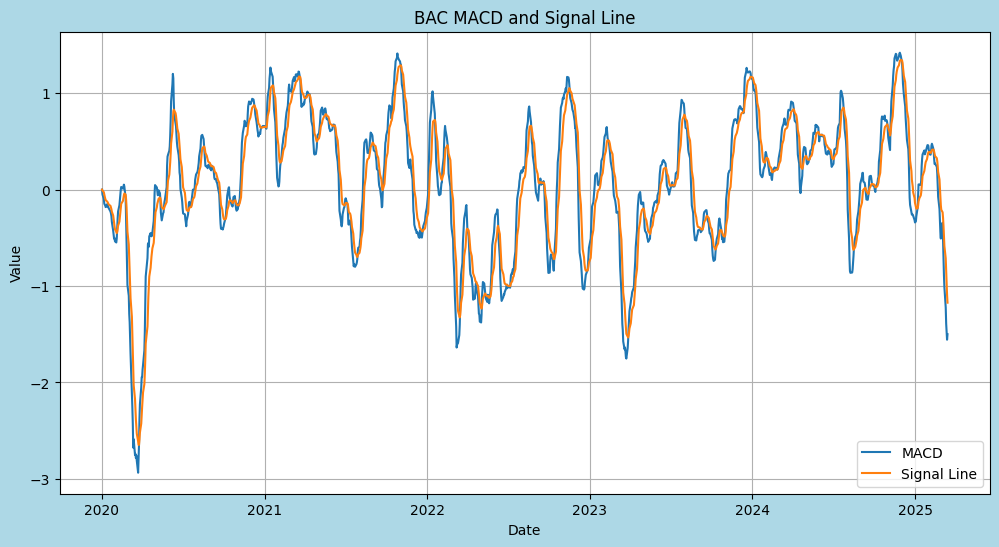

In [12]:
# Plot MACD and Signal Line
plt.figure(figsize=(12, 6),facecolor='lightblue')
plt.plot(stock_data['MACD'], label='MACD')
plt.plot(stock_data['Signal_Line'], label='Signal Line')
plt.title('BAC MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('BAC_MACD_Signal.png')

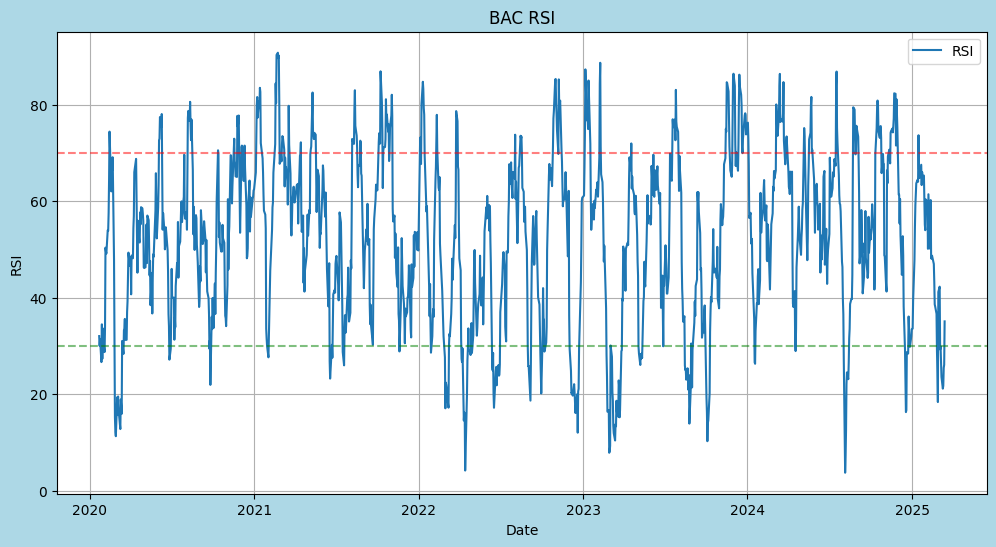

In [13]:
# Plot RSI
plt.figure(figsize=(12, 6),facecolor='lightblue')
plt.plot(stock_data['RSI'], label='RSI')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('BAC RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()